In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import ray

In [15]:
@ray.remote
def simulate_workload(worker_id, delay_range=(0.5, 2.0)):
    start = time.time()
    time.sleep(random.uniform(*delay_range))
    end = time.time()
    return worker_id, end - start

In [16]:
# Run jobs
num_workers = 6
futures = [simulate_workload.remote(i) for i in range(num_workers)]
results = ray.get(futures)

In [17]:
# Sort and prepare for plotting
results.sort(key=lambda x: x[0])
worker_ids = [r[0] for r in results]
runtimes = [r[1] for r in results]

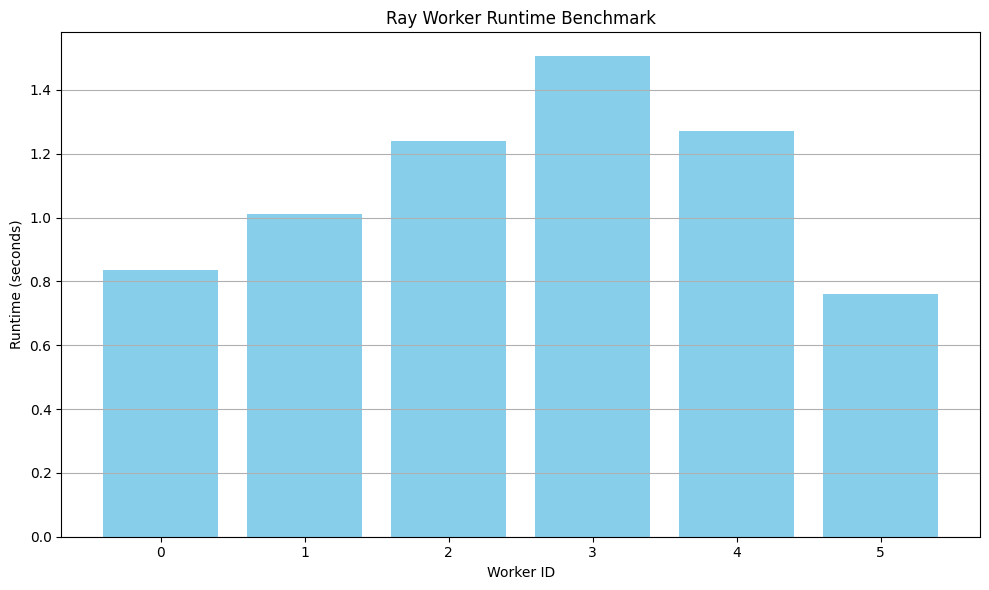

In [18]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(worker_ids, runtimes, color='skyblue')
plt.xlabel("Worker ID")
plt.ylabel("Runtime (seconds)")
plt.title("Ray Worker Runtime Benchmark")
plt.xticks(worker_ids)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [20]:
import socket

In [22]:
@ray.remote
def simulate_workload(worker_id):
    start = time.time()
    time.sleep(random.uniform(0.5, 2.0))
    end = time.time()
    node_ip = ray._private.services.get_node_ip_address()
    hostname = socket.gethostname()
    return {
        "id": worker_id,
        "runtime": round(end - start, 3),
        "node_ip": node_ip,
        "hostname": hostname
    }

# Jalankan
futures = [simulate_workload.remote(i) for i in range(6)]
results = ray.get(futures)

# Tampilkan hasil
for r in results:
    print(f"Worker {r['id']} on node {r['hostname']} ({r['node_ip']}), runtime: {r['runtime']}s")

Worker 0 on node raycluster-kuberay-workergroup-worker-ggrs5 (172.16.149.197), runtime: 1.394s
Worker 1 on node raycluster-kuberay-workergroup-worker-ggrs5 (172.16.149.197), runtime: 0.675s
Worker 2 on node raycluster-kuberay-workergroup-worker-ggrs5 (172.16.149.197), runtime: 1.094s
Worker 3 on node raycluster-kuberay-workergroup-worker-ggrs5 (172.16.149.197), runtime: 0.75s
Worker 4 on node raycluster-kuberay-workergroup-worker-ggrs5 (172.16.149.197), runtime: 0.516s
Worker 5 on node raycluster-kuberay-workergroup-worker-ggrs5 (172.16.149.197), runtime: 0.816s
